<a href="https://colab.research.google.com/github/gagansingh23/Michael_Jordan/blob/master/Gagan_Singh_DS11_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading the Michael Jordan DataSet from a Saved File


**SOURCE**
https://www.kaggle.com/edgarhuichen/nba-players-career-game-log/download/KXGfQhsAPRLTtJHoKG1Y%2Fversions%2F7C1HyZd1kRUsuHeqUrC0%2Ffiles%2Fjordan_career.csv?datasetVersionNumber=2

In [5]:
#Upload CSV File
from google.colab import files
uploaded = files.upload()

Saving jordan_career.csv to jordan_career.csv


In [0]:
#Rename CSV file to MJ
import io
import pandas as pd
mj = pd.read_csv(io.BytesIO(uploaded['jordan_career.csv']))

Examine The Shape, Column Headers, find out what needs to be clean. 

In [206]:
#Make sure number of rows match number of games
mj.shape

(1072, 23)

In [0]:
mj.head(10)

In [0]:
#Drop columns we dont need
dropcl = ['game', 'team', 'opp', 'minus_plus', 'game_score']


In [0]:
mj = mj.drop(columns=dropcl, axis=1)

Minutes Per Game was a object type in the orginal csv, simply convert it to a float so we can perform calculations on it after

In [0]:
#Change MP column to a float
mj.mp = mj.mp.str.replace(":00",'').astype(float)

In [14]:
mj.head()

,date,age,result,mp,fg,fga,fgp,three,threeatt,threep,ft,fta,ftp,orb,drb,trb,ast,stl,blk,tov,pts
0,1984-10-26,21-252,W (+16),40.0,5,16,0.313,0,0,NaN,6,7,0.857,1,5,6,7,2,4,5,16
1,1984-10-27,21-253,L (-2),34.0,8,13,0.615,0,0,NaN,5,5,1.000,3,2,5,5,2,1,3,21
2,1984-10-29,21-255,W (+6),34.0,13,24,0.542,0,0,NaN,11,13,0.846,2,2,4,5,6,2,3,37
3,1984-10-30,21-256,W (+5),36.0,8,21,0.381,0,0,NaN,9,9,1.000,2,2,4,5,3,1,6,25
4,1984-11-01,21-258,L (-16),33.0,7,15,0.467,0,0,NaN,3,4,0.750,3,2,5,5,1,1,2,17


In [0]:
#Clean the result column
mj.result = mj.result.str.replace('\d+', '')

In [0]:
#Clean the age column by creating a new age column with just year
mj['age_rd'] = mj['age'].str[:2]
print(mj)  

In [0]:
#change new column from object to int
import numpy as np
mj['age_rd'] = mj['age_rd'].astype(np.int64)

**Exploring The Data:**

In [0]:
#Create a points per minute column
mj['points_per_minute'] = mj['pts'] / mj['mp']


In [208]:
#Get the sum of each statistically category
mj.sum(axis = 0, skipna = True) 

date                 1984-10-261984-10-271984-10-291984-10-301984-1...
age                  21-25221-25321-25521-25621-25821-26421-26521-2...
result               W (+)L (-)W (+)W (+)L (-)W (+)W (+)W (+)W (+)L...
mp                                                               41013
fg                                                               12192
fga                                                              24537
fgp                                                            531.434
three                                                              581
threeatt                                                          1778
threep                                                         202.507
ft                                                                7327
fta                                                               8772
ftp                                                            863.364
orb                                                               1668
drb   

In [17]:
#Average Points per minute
mj.points_per_minute.mean()

0.7863841443632139

In [18]:

#average assists per game 
mj.ast.mean()

5.254664179104478

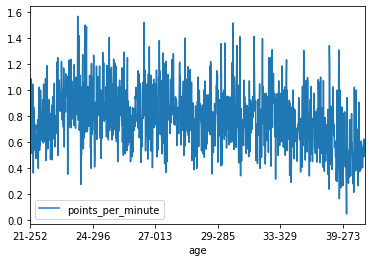

In [20]:
mj.plot(x='age', y='points_per_minute')

In [21]:
#Instances where MJ scored more than 1.5 points per minute
mj[mj['points_per_minute'] > 1.5]

,date,age,result,mp,fg,fga,fgp,three,threeatt,threep,ft,fta,ftp,orb,drb,trb,ast,stl,blk,tov,pts,points_per_minute
152,1987-02-26,24-009,W (+15),37.0,16,25,0.640,0,0,NaN,26,27,0.963,1,7,8,3,3,2,3,58,1.567568
364,1989-12-14,26-300,W (+11),25.0,14,20,0.700,3,3,1.0,7,9,0.778,2,5,7,5,2,0,1,38,1.520000
649,1993-03-20,30-031,W (+25),31.0,16,27,0.593,2,2,1.0,13,15,0.867,0,8,8,4,2,0,1,47,1.516129


In [26]:
#Win-Loss Record
mj_record = mj.result.value_counts()

W (+)    706
L (-)    366
Name: result, dtype: int64

In [0]:

#Filter where Jordan scored more than 40
fourty = mj[mj['pts'] > 40]

In [0]:
#Filter when Jordan scored less than 10 
ten = mj[mj['pts'] < 10] 

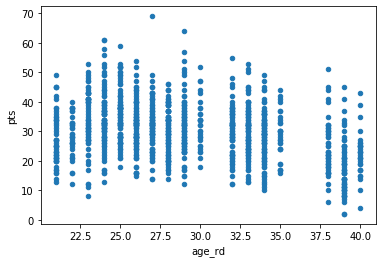

In [86]:

mj.plot.scatter('age_rd', 'pts');

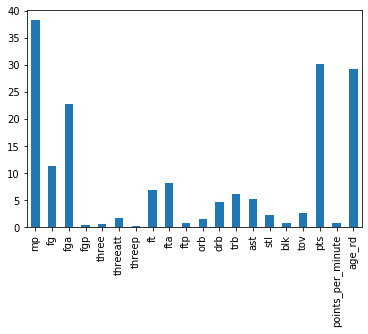

In [87]:
#Explore Data, find career averages
mj.mean().plot(kind='bar')

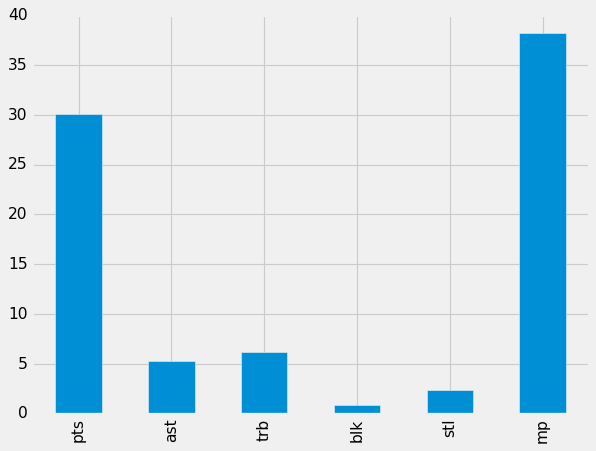

In [194]:
#career averages for main categories
main_stats = mj[['pts', 'ast', 'trb', 'blk', 'stl', 'mp']]
main_stats.mean().plot(kind='bar')


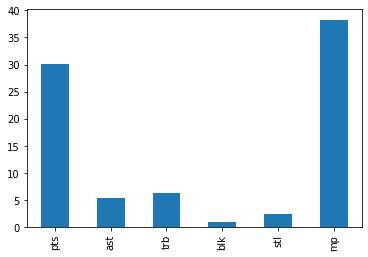

In [89]:
main_stats.mean().plot(kind='bar')

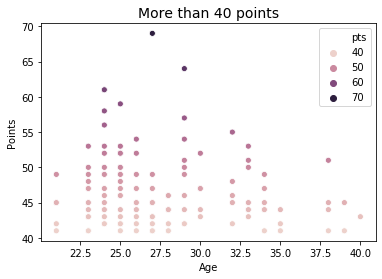

In [90]:
import seaborn as sns
ax = sns.scatterplot(data=fourty, x='age_rd',y='pts', hue='pts');
ax.set_title("More than 40 points", fontsize=14);
ax.set_xlabel("Age", fontsize=10)
ax.set_ylabel("Points", fontsize=10);

In [0]:
ten_graph = ten[['age_rd','pts']]

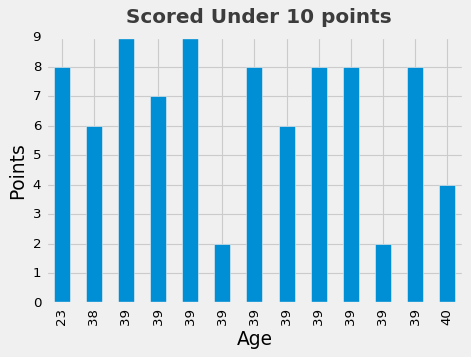

In [193]:
import numpy as np

plt.style.use('fivethirtyeight')
ax = ten_graph.plot(x='age_rd', y='pts',kind='bar', figsize = (6,4,), legend=False)
ax.plot(xticks=ten_graph.index, rot=90)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.text(x = 2.0, y = 9.5, s = "Scored Under 10 points", weight='bold',
               fontsize = 18, alpha = .75)
ax.set_xlabel("Age")
ax.set_ylabel("Points");

In [198]:
mj.fg.sum()

12192

In [199]:
mj.fga.sum()

24537

In [202]:
mj.points_per_minute.mean()

0.7863841443632139

We have created visualizations describing the scoring of Michael Jordan. Using data to tell the story of how great this player was, and how during most of his years he played at a level of consistency. 